<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/TensorFlow_08_Convnet_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('cats_and_dogs_small_2.h5')

In [ ]:
model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
!unzip cats_and_dogs_small.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: cats_and_dogs_small/train/cats/cat.333.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.333.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.864.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.864.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.870.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.870.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.680.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.680.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.858.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.858.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.99.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.99.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.694.jpg  
  inflating: __MACOSX/cats_and_dogs_small/train/cats/._cat.694.jpg  
  inflating: cats_and_dogs_small/train/cats/cat.72.jpg  
  inflating: __MACOS

In [ ]:
img_path = './cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image 
import numpy as np
img = image.load_img(img_path, target_size=(150, 150)) 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0) 
img_tensor /= 255.
print(img_tensor.shape)

(1, 150, 150, 3)


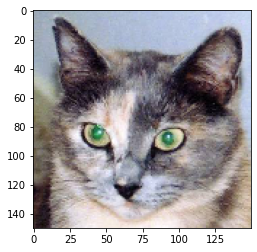

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0]) 
plt.show()

In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)

In [ ]:
activations

[array([[[[192.74178  , 154.21349  ,  89.95665  , ..., 143.6641   ,
           111.92667  , 183.05594  ],
          [194.08792  , 140.204    ,  89.9594   , ..., 141.42513  ,
           111.92667  , 182.98729  ],
          [208.21289  , 186.83961  ,  93.97464  , ..., 136.83     ,
           111.92667  , 185.5104   ],
          ...,
          [259.45264  , 192.80876  ,  89.95665  , ..., 181.08035  ,
           111.92667  , 236.41782  ],
          [253.42003  , 200.65033  ,  89.95665  , ..., 180.32504  ,
           111.92667  , 238.1726   ],
          [253.31308  , 199.7225   ,  89.95665  , ..., 180.56647  ,
           111.92667  , 242.2272   ]],
 
         [[182.407    , 142.41898  ,  89.95665  , ..., 140.07355  ,
           111.92667  , 178.41617  ],
          [186.31529  , 134.7662   ,  89.95665  , ..., 137.56656  ,
           111.92667  , 177.63695  ],
          [204.08142  , 152.73695  , 120.34895  , ..., 138.30707  ,
           111.92667  , 183.05804  ],
          ...,
          [26

In [ ]:
first_layer_activation = activations[0]

In [ ]:
print (first_layer_activation.shape)

(1, 148, 148, 32)


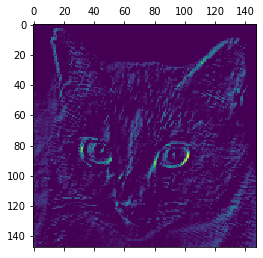

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 19], cmap='viridis')

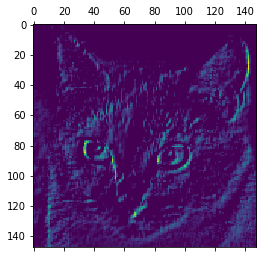

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 15], cmap='viridis')

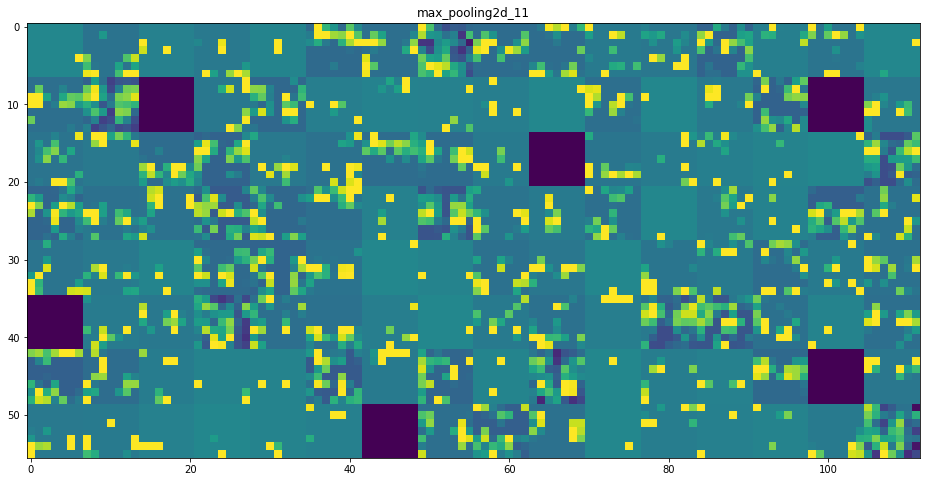

In [ ]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]

  size = layer_activation.shape[1]
  
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row] 
      
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8') 
      display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0])) 
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
layer_names

['conv2d_8',
 'max_pooling2d_8',
 'conv2d_9',
 'max_pooling2d_9',
 'conv2d_10',
 'max_pooling2d_10',
 'conv2d_11',
 'max_pooling2d_11']